<b><font size=20, color='#A020F0'>3D plotting with Matplotlib

Hannah Zanowski<br>
12/1/21<br>

#### Resources
[mplot3d toolkit](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html#sphx-glr-tutorials-toolkits-mplot3d-py)<br>

# A little about today's lecture

As the name a suggests, we'll be using matplotlib to learn how to make plots in 3D today. This can be a really useful tool for visualizing complex data, but it isn't always something we use in the day-to-day. Also, at this point in the semester, we've gotten through all of the major course material, so now it's time for miscellaneous fun things (i.e., I did not prepare a lecture)!

## The mplot3d toolkit
Matplotlib has a toolkit for plotting in 3d called [mplot3d](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html#sphx-glr-tutorials-toolkits-mplot3d-py). You can import it like you import anything else:

In [1]:
#making things interactive!
%matplotlib widget 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from IPython import display

### Setting up a 3d plot axis
You can set up a 3d plot by setting the `projection` keyword in the call to your plot axes:

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
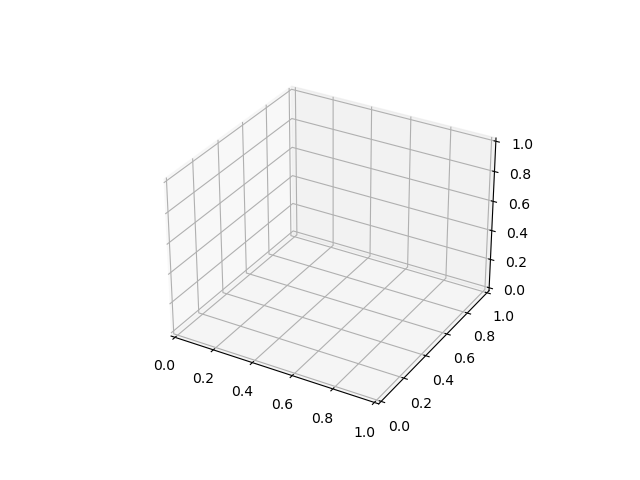

In [3]:
fig=plt.figure()
ax=plt.axes(projection='3d')

#or
#fig=plt.figure()
#ax=fig.add_subplot(111,projection='3d')

Let's look at what the type of the axis is...

In [ ]:
type(ax)

<b>Note:</b> There is a lot you can do with [Axes3D](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html)!

For multiple axes, use the `subplot_kw` argument, in the same way we did for setting up cartopy projections.

In [ ]:
fig,ax=plt.subplots(2,2,subplot_kw={'projection':'3d'})

## Making the plot

### Example 1: A 3D line plot
The plotting command for creating a 3d line plot is still [plot](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html#mpl_toolkits.mplot3d.Axes3D.plot) as in 2D plotting, but you need to feed a 3rd argument to the command. 

In [ ]:
#create some data for plotting
z=np.arange(0,10*np.pi,np.pi/12)
x=np.sin(z)
y=np.cos(z)

#set up axis
fig,ax=plt.subplots(subplot_kw={'projection':'3d'},figsize=(6,6))

#do the 3d plot
ax.plot(x,y,z,color='m')

<b>Note:</b> If you provide 3 arguments to `plot()` when your axis is only 2D, python will try to make a plot, but it's not going to be what you wanted

In [ ]:
fig,ax=plt.subplots()
ax.plot(x,y,z)

### Example 2: 3D contour plots
For 3D contour plots, independent variables need to be <b>2D regular grids</b> and the value of the function needs to be defined at those points, i.e. it should be of the form $z=f(x,y)$

In [ ]:
#create some data for plotting
x=np.linspace(-10,10,100)
y=x
x,y=np.meshgrid(x,y)
z=np.sqrt(x**2+y**2)

In [ ]:
#set up axis
fig,ax=plt.subplots(subplot_kw={'projection':'3d'},figsize=(6,6))

#make the contour plot
ax.contour(x, y, z, 30) #last argument is number of contour levels

#add labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

If you want to change the viewing angle after you set up the plot, you can use `view_init`

In [ ]:
ax.view_init(45, 15) #elevation, azimuth
fig

You can also do filled contour plots:

In [ ]:
#set up axis
fig,ax=plt.subplots(subplot_kw={'projection':'3d'},figsize=(6,6))

#make the contour plot
cs1=ax.contourf(x, y, -z, cmap=plt.cm.cividis) #last argument is number of contour levels
plt.colorbar(cs1,shrink=0.8,orientation='horizontal')

#add labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

### Example 3: Surface plots
These types of plots project a 2D grid of values onto a 3D surface rather than having disparate contours. You can make a wireframe plot with [plot_wireframe()](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html#wireframe-plots) or a filled surface plot with [plot_surface()](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html#surface-plots)

In [ ]:
#wireframe example
#set up axis
fig,ax=plt.subplots(subplot_kw={'projection':'3d'},figsize=(6,6))

#make the wireframe plot
ax.plot_wireframe(x, y, z,color='navy')

#add labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [ ]:
#surface plot example
#set up axis
fig,ax=plt.subplots(subplot_kw={'projection':'3d'},figsize=(6,6))

#make the plot
cs1=ax.plot_surface(x, y, -z, cmap=plt.cm.cividis) #last argument is number of contour levels
plt.colorbar(cs1,shrink=0.8,orientation='horizontal')

#add labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

### Example 4: triangulation 
What if your data aren't on an evenly-spaced grid? Matplotlib has a triangulation option! The command is [plot_trisurf()](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html#surface-plots)

In [ ]:
#create the data
#this time choose random points instead of having a grid
theta=2*np.pi*np.random.random(1000)
r=4.5*np.random.random(1000)
x=r*np.sin(theta)
y=r*np.cos(theta)
z=(10*np.sqrt(2)*np.pi)*np.exp(-0.5*x**2)*np.exp(-0.5*y**2)

Let's make a quick 3D scatterplot first to visualize the data

In [ ]:
#set up axis
fig,ax=plt.subplots(subplot_kw={'projection':'3d'},figsize=(8,8))

#make the plot
ax.scatter(x, y, z, c=z) #c is the color

Now make a plot of the surface with `plot_trisurf`:

In [ ]:
#surface plot example
#set up axis
fig,ax=plt.subplots(subplot_kw={'projection':'3d'},figsize=(6,6))

#make the trisurf plot
cs1=ax.plot_trisurf(x, y, z, cmap=plt.cm.cividis) #last argument is number of contour levels
plt.colorbar(cs1,shrink=0.8,orientation='horizontal')

#add labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

---

## Now you get to try it!

Make a 3D surface plot of the following equation:

$f(x,y)=\frac{xy(x^{2}-y^{2})}{(x^{2}+y^{2})}$

Where <br>
x=np.range(-10.1,10.1,0.5)<br>
y=x

To see my solution, run the following:

In [ ]:
display.Code('3d_plotting_solution.py')